In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('Housing.csv')


In [3]:
data_clean = data.copy()

In [4]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea', 'furnishingstatus']

In [5]:
le = LabelEncoder()
for col in categorical_cols:
    data_clean[col] = le.fit_transform(data_clean[col])

In [6]:
X = data_clean.drop('price', axis=1)
y = data_clean['price']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1771751116594.0352


In [10]:
sample_data = pd.DataFrame({
    'area': [5000],
    'bedrooms': [3],
    'bathrooms': [2],
    'stories': [2],
    'mainroad': [1],          # yes = 1
    'guestroom': [0],         # no = 0
    'basement': [1],          # yes = 1
    'hotwaterheating': [0],   # no = 0
    'airconditioning': [1],   # yes = 1
    'parking': [2],
    'prefarea': [1],          # yes = 1
    'furnishingstatus': [1]   # semi-furnished = 1
})

predicted_price = model.predict(sample_data)
print(f'Predicted House Price: {predicted_price[0]}')

Predicted House Price: 7131283.387416512


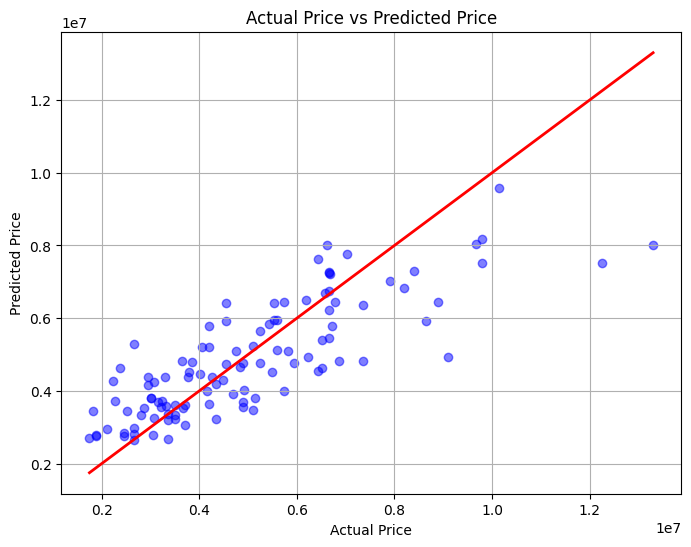

In [11]:
import matplotlib.pyplot as plt

# Scatter plot of Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()


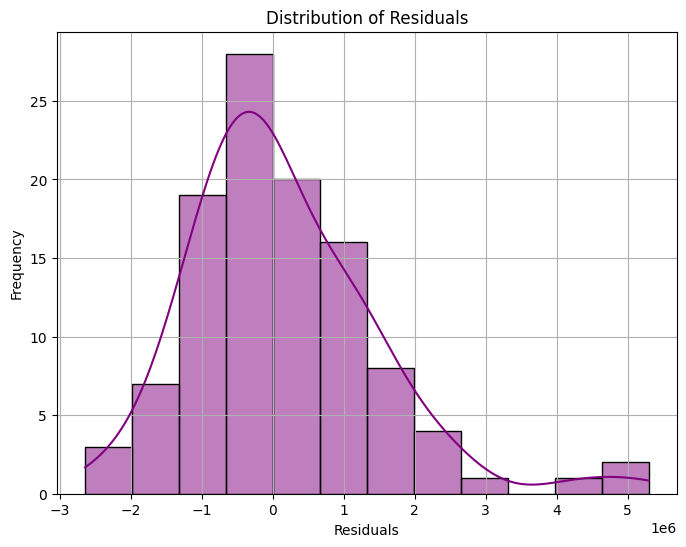

In [12]:
import seaborn as sns

# Residuals (Errors) = Actual - Predicted
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/tmp/ipython-input-13-2559343124.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


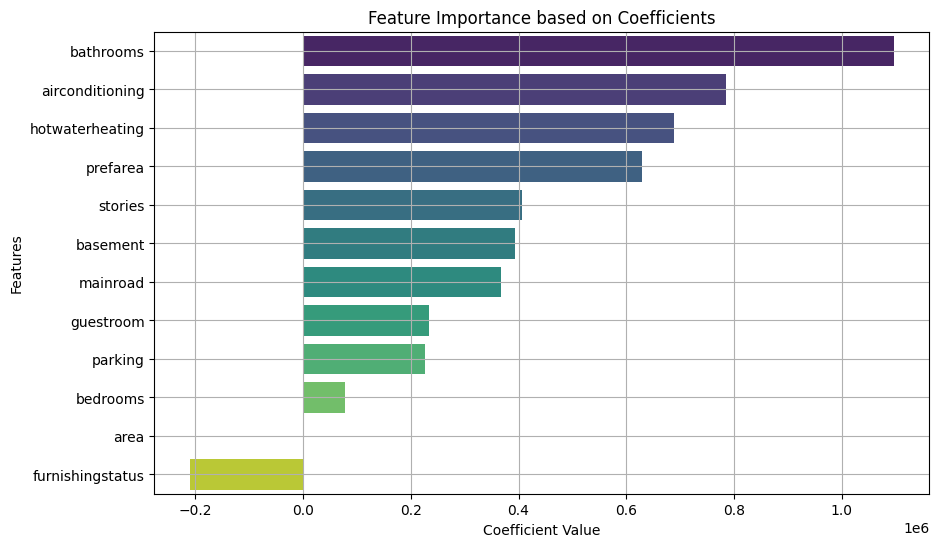

In [13]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Feature Importance based on Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.grid(True)
plt.show()
